# In this project, we will perform customer segmentation using K-Means clustering on a dataset.
# This technique is useful for identifying different customer groups based on their spending patterns and income.



!pip install numpy pandas matplotlib seaborn scikit-learn


## Step 1: Import Libraries


We need to import necessary libraries such as NumPy, Pandas for data manipulation, and Matplotlib/Seaborn for visualization.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



## Step 2: Load and Explore the Dataset
We'll load a dataset for customer segmentation, which contains features like annual income and spending score. The dataset will help us perform clustering.


In [10]:
url = 'https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv'
data = pd.read_csv(url)



data.head()


,Index,"Height(Inches)""","""Weight(Pounds)"""
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


## Step 3: Data Preprocessing
We'll select the features for clustering, normalize them using StandardScaler to ensure all features are on the same scale, and explore the data.


In [14]:
# Print the exact column names to inspect them
print(data.columns)

# Rename the columns explicitly if necessary
# Example: Assuming the issue lies with quotes or spaces in the column names
data.columns = ['Index', 'Height(Inches)', 'Weight(Pounds)']

# Now try selecting the columns again
X = data[['Height(Inches)', 'Weight(Pounds)']]

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display scaled data
X_scaled[:5]


Index(['Index', 'Height(Inches)"', '"Weight(Pounds)"'], dtype='object')


array([[-1.12105074, -1.19285282],
       [ 1.84458262,  0.77680287],
       [ 0.74926159,  2.16310521],
       [ 0.13960177,  1.26712141],
       [-0.08256241,  1.43139908]])

## Step 4: Determine Optimal Number of Clusters using Elbow Method
The elbow method helps us to find the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the number of clusters.


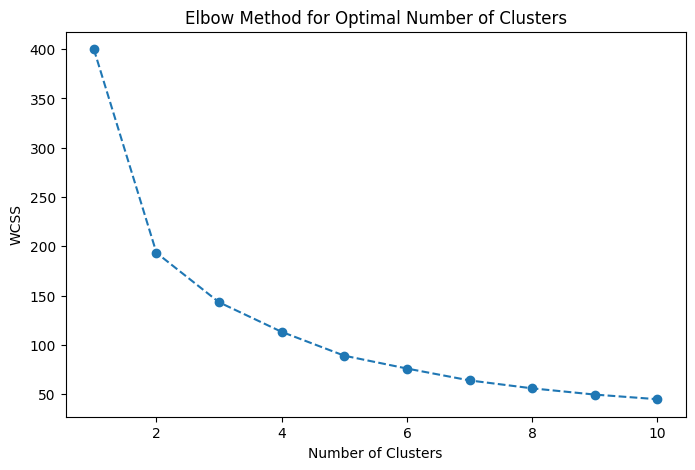

In [15]:
# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


## Step 5: Train the K-Means Model
We'll now train the K-Means clustering model with the optimal number of clusters (from the elbow method) and assign customers to clusters.


In [16]:
# Train the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)


## Step 6: Visualize the Clusters
We will now visualize the customer segments using a scatter plot, where each color represents a different segment.


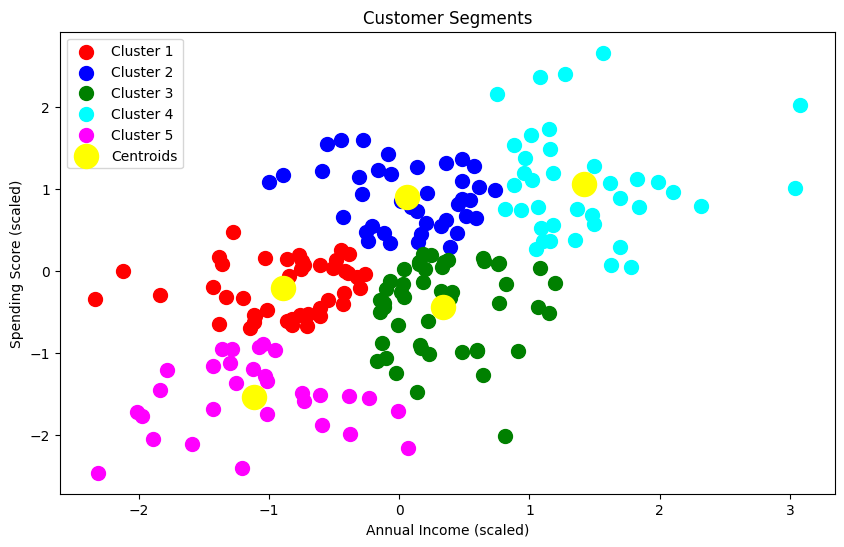

In [17]:
# Visualize the clusters
plt.figure(figsize=(10,6))

plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


## Conclusion
The K-Means clustering model successfully segmented customers based on their annual income and spending score. Each cluster represents a different customer group, which can be used to target specific marketing strategies.
